## ISYE6501x Homework 8


## Loading Libraries

In [1]:
options(warn=-1)

In [8]:
message=FALSE

In [3]:
library(ggplot2)

In [9]:
library(tidyverse)

In [10]:
library(caret)

In [11]:
library(MASS)

In [12]:
library(glmnet)

## Question 11.1

Using the crime data set uscrime.txt from Questions 8.2, 9.1, and 10.1, build a regression model
using:
1. Stepwise regression
2. Lasso
3. Elastic net

For Parts 2 and 3, remember to scale the data first – otherwise, the regression coefficients will be on
different scales and the constraint won’t have the desired effect.

### Loading Crime Data

In [13]:
#loading data
crime=read_tsv("uscrime.txt")

Parsed with column specification:
cols(
  M = col_double(),
  So = col_double(),
  Ed = col_double(),
  Po1 = col_double(),
  Po2 = col_double(),
  LF = col_double(),
  M.F = col_double(),
  Pop = col_double(),
  NW = col_double(),
  U1 = col_double(),
  U2 = col_double(),
  Wealth = col_double(),
  Ineq = col_double(),
  Prob = col_double(),
  Time = col_double(),
  Crime = col_double()
)



Criminologists are interested in the effect of punishment regimes on crime rates. This has been studied using aggregate data on 47 states of the USA for 1960. The data set contains the following columns:

    Variable   Description
    M		percentage of males aged 14–24 in total state population
    So		indicator variable for a southern state
    Ed		mean years of schooling of the population aged 25 years or over
    Po1		per capita expenditure on police protection in 1960
    Po2		per capita expenditure on police protection in 1959
    LF		labour force participation rate of civilian urban males in the age-group 14-24
    M.F		number of males per 100 females
    Pop		state population in 1960 in hundred thousands
    NW		percentage of nonwhites in the population
    U1		unemployment rate of urban males 14–24
    U2		unemployment rate of urban males 35–39
    Wealth	wealth: median value of transferable assets or family income
    Ineq	income inequality: percentage of families earning below half the median income
    Prob	probability of imprisonment: ratio of number of commitments to number of offenses
    Time	average time in months served by offenders in state prisons before their first release
    Crime		crime rate: number of offenses per 100,000 population in 1960

In [14]:
#checking the data
head(crime)

M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
15.1,1,9.1,5.8,5.6,0.510,95.0,33,30.1,0.108,4.1,3940,26.1,0.084602,26.2011,791
14.3,0,11.3,10.3,9.5,0.583,101.2,13,10.2,0.096,3.6,5570,19.4,0.029599,25.2999,1635
14.2,1,8.9,4.5,4.4,0.533,96.9,18,21.9,0.094,3.3,3180,25.0,0.083401,24.3006,578
13.6,0,12.1,14.9,14.1,0.577,99.4,157,8.0,0.102,3.9,6730,16.7,0.015801,29.9012,1969
14.1,0,12.1,10.9,10.1,0.591,98.5,18,3.0,0.091,2.0,5780,17.4,0.041399,21.2998,1234
12.1,0,11.0,11.8,11.5,0.547,96.4,25,4.4,0.084,2.9,6890,12.6,0.034201,20.9995,682


### Splitting data for training and testing

In [15]:
#number of rows in crime data set
r<-nrow(crime)

In [16]:
set.seed(1)

#generating random numbers for index
train<-round(sample(1:r, size=r*0.8))

#getting data with random indices
training<-crime[train,]

#assiging the rest of data to test data set
testing<-crime[-train,]

### Standardizing the data

For standardazing the data, it is not neccessary to scale the output/response and it does not make sense to standardazie a categorical data. So, we will take out independent variable : So and response from data and put it back with normalized data.

In [17]:
#scaling data, taking out categorical and response variable
scaled.data<-scale(crime[,c(-2,-16)],center=TRUE,scale=TRUE) 

#binding categorical and response variable to training and test data
scaled.tr<-cbind(scaled.data[train,],crime[train,c(2,16)])
scaled.te<-cbind(scaled.data[-train,],crime[-train,c(2,16)])



### Stepwise Regression

Stepwise selection is a feature selection technique for linear regression models. We will fit a linear regression model using train() in caret specifying this method.

In [128]:
set.seed(1)

#cross-validation, 5-fold
train.control=trainControl(method="cv",
                          number=5)
#we don't need scaled data for this method
sw.model<-train(Crime~.,data=training,
             method="lmStepAIC",
             trControl=train.control,
             trace=FALSE)


In [129]:
summary(sw.model)


Call:
lm(formula = .outcome ~ M + Ed + Po1 + U2 + Wealth + Ineq, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-271.32 -123.33  -13.88  106.18  329.92 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.627e+03  1.001e+03  -6.618 2.51e-07 ***
M            9.647e+01  3.199e+01   3.016  0.00518 ** 
Ed           2.309e+02  4.702e+01   4.910 3.01e-05 ***
Po1          8.464e+01  1.829e+01   4.628 6.65e-05 ***
U2           8.287e+01  3.797e+01   2.183  0.03703 *  
Wealth       1.581e-01  9.429e-02   1.677  0.10390    
Ineq         9.759e+01  1.853e+01   5.267 1.09e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 168.2 on 30 degrees of freedom
Multiple R-squared:  0.7557,	Adjusted R-squared:  0.7069 
F-statistic: 15.47 on 6 and 30 DF,  p-value: 5.313e-08


In [130]:
sw.model$finalModel


Call:
lm(formula = .outcome ~ M + Ed + Po1 + U2 + Wealth + Ineq, data = dat)

Coefficients:
(Intercept)            M           Ed          Po1           U2       Wealth  
 -6627.4427      96.4691     230.8667      84.6435      82.8654       0.1581  
       Ineq  
    97.5886  


Using stepwise selection, 6 features have been selected to fit a linear regression. Connsidering the fact that we have only 37 observations for training the model, and 6 variables contributing in model, there is still overfitting.

Looking at coefficients of the model, it makes sense that income inequality has the most weight in predicting crime rate,
followed by years of education, police protection,wealth, percentage of male poplulation, and unemployment with next higher coefficients.

Stepwise method to select features has some drawbacks. Stepwise selection uses many repeated hypothesis tests to make decisions on the inclusion or exclusion of individual predictors. The corresponding p-values are unadjusted, leading to an over-selection of features (i.e., false positive findings). In addition, this problem is exacerbated when highly correlated predictors are present.

If we look closer at features selected by final model, we observe that many of them highly correlated. 

Stepwise selection uses greedy algorithm that give us the "good enough" solution which might not be the "best solution".


In [131]:
#function to calculate R-squared
#input: predicted and actual values
#returns R-squared value
R_squared<-function(prediction,actual){
    
    sse<-sum((prediction-actual)^2)
    sst<-sum((actual-mean(actual))^2)
   
    return(1-sse/sst)
}

In [132]:
#prediction of test data set
sw.pred<-predict(sw.model,testing[,-16])


In [133]:
#using caret package to find R2
postResample(pred = sw.pred, obs = scaled.te$Crime)


RMSE   Rsquared        MAE 
345.171457   0.721679 273.847016

In [134]:
#checking the correlation matrix
cor(sw.pred,scaled.te$Crime)**2

[1] 0.721679

The above function in caret uses the correlation squared approximation for R-squared not the conventional 1-SSE/SST.
We can calculate R-squared as Explained variation / Total variation: 

In [135]:
sw.R2<-R_squared(sw.pred,scaled.te$Crime)
sw.R2

[1] 0.6301542

It is very hard to evaluate the model quality since we have only 20 data points for test set and 6 independent variables.Even in prediction of test data set, there is still possibility of overfitting. However, compared to techniques used in previous homeworks, this model shows a good performance.

### Lasso Regression

In [136]:
lambda <- 10^seq(-3, 3, length = 100)

set.seed(1)

train.control=trainControl(method="cv",
                          number=5)

lasso.model<-train(Crime~.,data=scaled.tr,#using scaled training data
             method="glmnet",
             trControl=train.control,
             tuneGrid=expand.grid(alpha=1,lambda=lambda))#for lasso, alpha=1


In [137]:
summary(lasso.model)

            Length Class      Mode     
a0            88   -none-     numeric  
beta        1320   dgCMatrix  S4       
df            88   -none-     numeric  
dim            2   -none-     numeric  
lambda        88   -none-     numeric  
dev.ratio     88   -none-     numeric  
nulldev        1   -none-     numeric  
npasses        1   -none-     numeric  
jerr           1   -none-     numeric  
offset         1   -none-     logical  
call           5   -none-     call     
nobs           1   -none-     numeric  
lambdaOpt      1   -none-     numeric  
xNames        15   -none-     character
problemType    1   -none-     character
tuneValue      2   data.frame list     
obsLevels      1   -none-     logical  
param          0   -none-     list     

In [139]:
#optimized value for lambda
lasso.model$bestTune

,alpha,lambda
,<dbl>,<dbl>
60,1,3.764936


In [140]:
# Model coefficients
coef(lasso.model$finalModel, lasso.model$bestTune$lambda)


16 x 1 sparse Matrix of class "dgCMatrix"
                     1
(Intercept) 878.540684
M            92.176884
Ed          237.015651
Po1         222.407558
Po2           .       
LF            .       
M.F           .       
Pop           1.090525
NW           67.084266
U1            4.894793
U2           59.104608
Wealth       99.155343
Ineq        317.573754
Prob        -67.278009
Time        -28.372296
So            .       

In [147]:
# Make predictions
lasso.pred <- lasso.model %>% predict(scaled.te[,-16])


In [148]:
postResample(lasso.pred, scaled.te$Crime)

RMSE    Rsquared         MAE 
344.0329438   0.7198888 274.4463493

In [149]:
#R-squared value for test data 
lasso.R2<-R_squared(lasso.pred,scaled.te$Crime)
lasso.R2

[1] 0.6325899

The R-Squared value for lasso is slightly better than stepwise method. If we look at variables selected for lasso regression model, we observe that important features in stepwise regression (M, Ed, Po1, U2, Wealth and Ineq) are also among important features here.


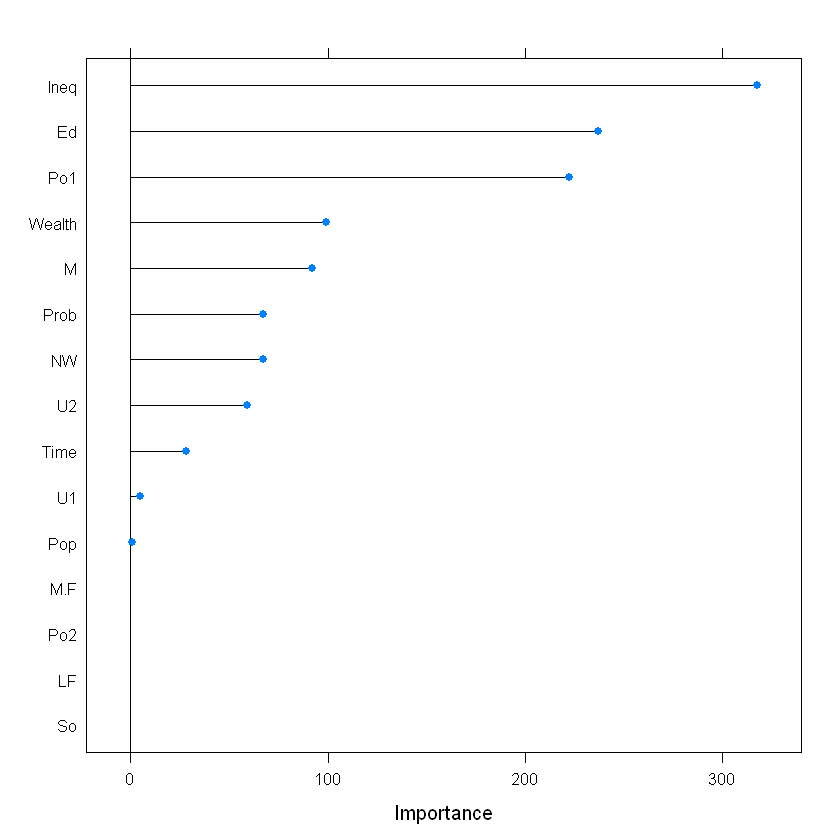

In [150]:
#visualizing features ranked by importance
plot(varImp(lasso.model, scale = FALSE))

### Elastic net Regression

In [151]:
lambda_e<-seq(0,100)
alpha_e<-seq(0,1,by=0.1)

In [152]:
set.seed(1)

train.control=trainControl(method="cv",
                          number=5)

elastic.model<-train(Crime~.,data=scaled.tr,
             method="glmnet",
             trControl=train.control,
             tuneGrid=expand.grid(alpha=alpha_e,lambda=lambda_e))


In [153]:
summary(elastic.model)

            Length Class      Mode     
a0            95   -none-     numeric  
beta        1425   dgCMatrix  S4       
df            95   -none-     numeric  
dim            2   -none-     numeric  
lambda        95   -none-     numeric  
dev.ratio     95   -none-     numeric  
nulldev        1   -none-     numeric  
npasses        1   -none-     numeric  
jerr           1   -none-     numeric  
offset         1   -none-     logical  
call           5   -none-     call     
nobs           1   -none-     numeric  
lambdaOpt      1   -none-     numeric  
xNames        15   -none-     character
problemType    1   -none-     character
tuneValue      2   data.frame list     
obsLevels      1   -none-     logical  
param          0   -none-     list     

In [154]:
elastic.model$bestTune

,alpha,lambda
,<dbl>,<int>
612,0.6,5


In [68]:
coef(elastic.model$finalModel, elastic.model$finalModel$lambdaOpt)

16 x 1 sparse Matrix of class "dgCMatrix"
                      1
(Intercept) 877.0066371
M            94.7137235
Ed          228.7915566
Po1         211.8315893
Po2           .        
LF           -0.5923834
M.F           .        
Pop           8.0929198
NW           70.1606782
U1            9.1056773
U2           54.5285415
Wealth      104.8634242
Ineq        308.8210598
Prob        -71.7776731
Time        -35.8642094
So            .        

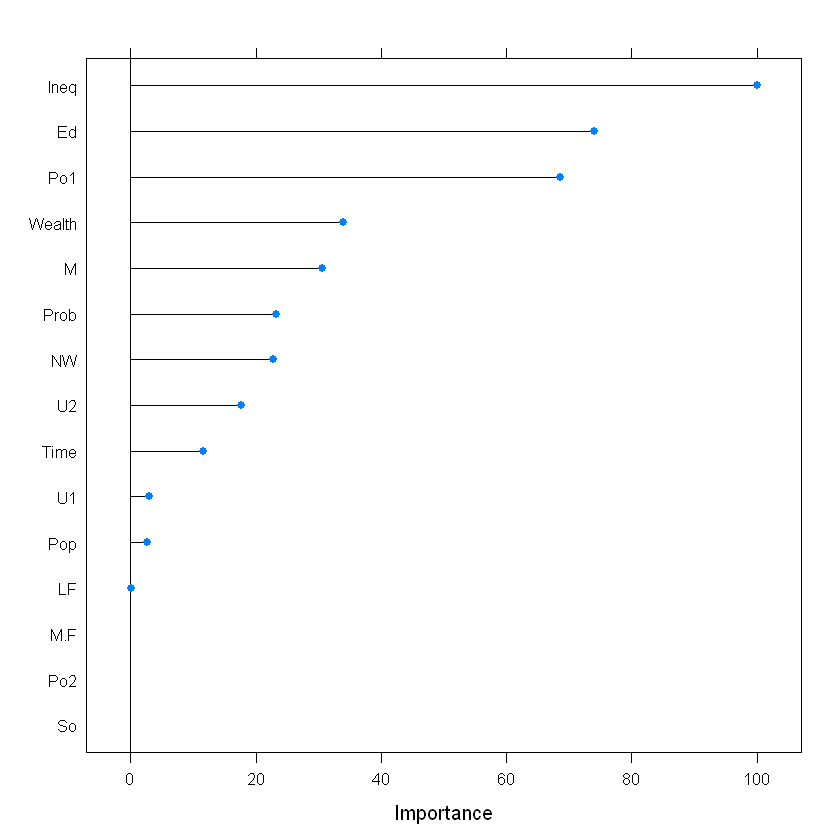

In [126]:
plot(varImp(elastic.model))

In [123]:
elastic.pred<-predict(elastic.model,scaled.te[,-16])

In [155]:
#R-squared value
R_squared(elastic.pred,scaled.te$Crime)

[1] 0.6211592

In [125]:
postResample(elastic.pred,scaled.te$Crime)

RMSE    Rsquared         MAE 
349.3436790   0.7209606 277.8909374

Using elastic net method, we can see similar features are selected in fitting the model. R-squared value of elastic net method is slightly worse than the other two methods.

Overall, for our data set, stepwise selection and lasso method result in a linear regression model with decent R-squared values. These models are also easy to interpret and show better performance (compared to models built before such as PCA and random forest).

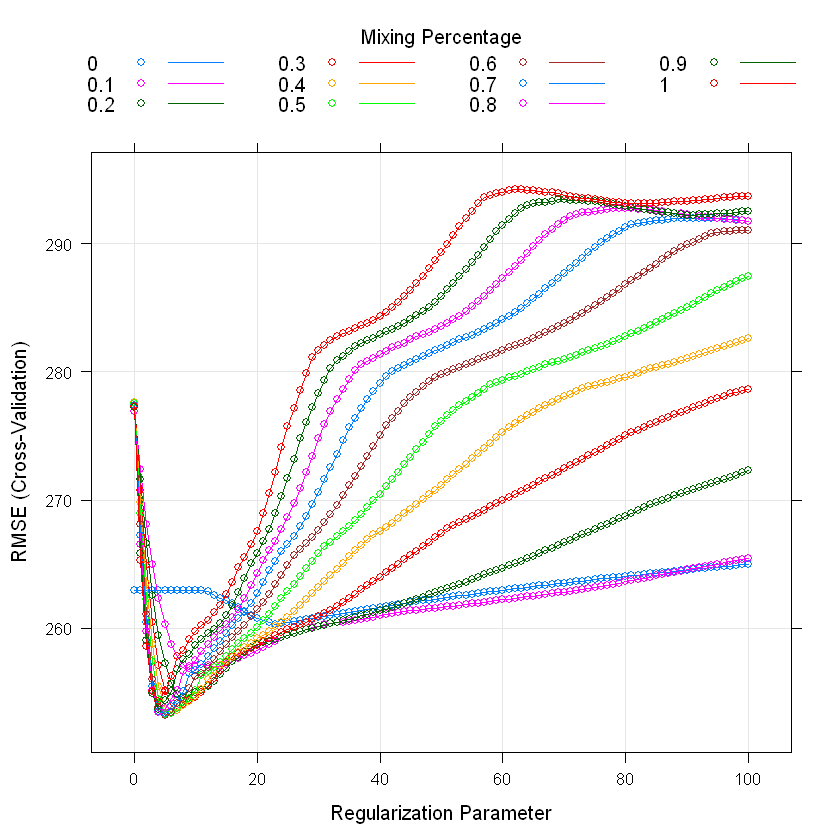

In [69]:
plot(elastic.model)